# Chronic Kidney Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd /Users/vishesh/Downloads

/Users/vishesh/Downloads


In [3]:
# loading data

df= pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# rename column names to make it more user-friendly

df.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'Target']

In [5]:
df.shape

(400, 26)

In [6]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
Target                      object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [8]:
df.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df[['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'Target']]

,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,Target
0,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,38,6000,NaN,no,no,no,good,no,no,ckd
2,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...
395,47,6700,4.9,no,no,no,good,no,no,notckd
396,54,7800,6.2,no,no,no,good,no,no,notckd
397,49,6600,5.4,no,no,no,good,no,no,notckd
398,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,Target
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
object_cols = []

# loop through each column and check if it has dtype object
for col in df.columns:
    if df[col].dtype == 'object':
        object_cols.append(col)

# print object columns
print(object_cols)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'Target']


In [13]:
for col in object_cols:
    print('Unique value in {}: {}'.format(col, df[col].unique()))
    print('\n')

Unique value in red_blood_cells: [nan 'normal' 'abnormal']


Unique value in pus_cell: ['normal' 'abnormal' nan]


Unique value in pus_cell_clumps: ['notpresent' 'present' nan]


Unique value in bacteria: ['notpresent' 'present' nan]


Unique value in hypertension: ['yes' 'no' nan]


Unique value in diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]


Unique value in coronary_artery_disease: ['no' 'yes' '\tno' nan]


Unique value in appetite: ['good' 'poor' nan]


Unique value in peda_edema: ['no' 'yes' nan]


Unique value in aanemia: ['no' 'yes' nan]


Unique value in Target: ['ckd' 'ckd\t' 'notckd']




In [14]:
diabetes_mellitus = {'\tno':'no', '\tyes':'yes', ' yes': 'yes'}
coronary_artery_disease = {'\tno':'no'}
Target = {'ckd\t': 'ckd', 'notckd': 'no ckd'}


df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(diabetes_mellitus)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(coronary_artery_disease)
df['Target'] = df['Target'].replace(Target)

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'Target']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

Target has ['ckd' 'no ckd'] values



In [16]:
df['Target'] = df['Target'].map({'ckd': 0, 'no ckd': 1})
df['Target'] = pd.to_numeric(df['Target'])

In [17]:
num_cols = []

# loop through each column and check if it has dtype object
for col in df.columns:
    if df[col].dtype != 'object' and col not in ['Target', 'id']:
        num_cols.append(col)

# print non-object columns that are not named 'Target' or 'id'
print(num_cols)

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [18]:
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Target, Length: 400, dtype: int64

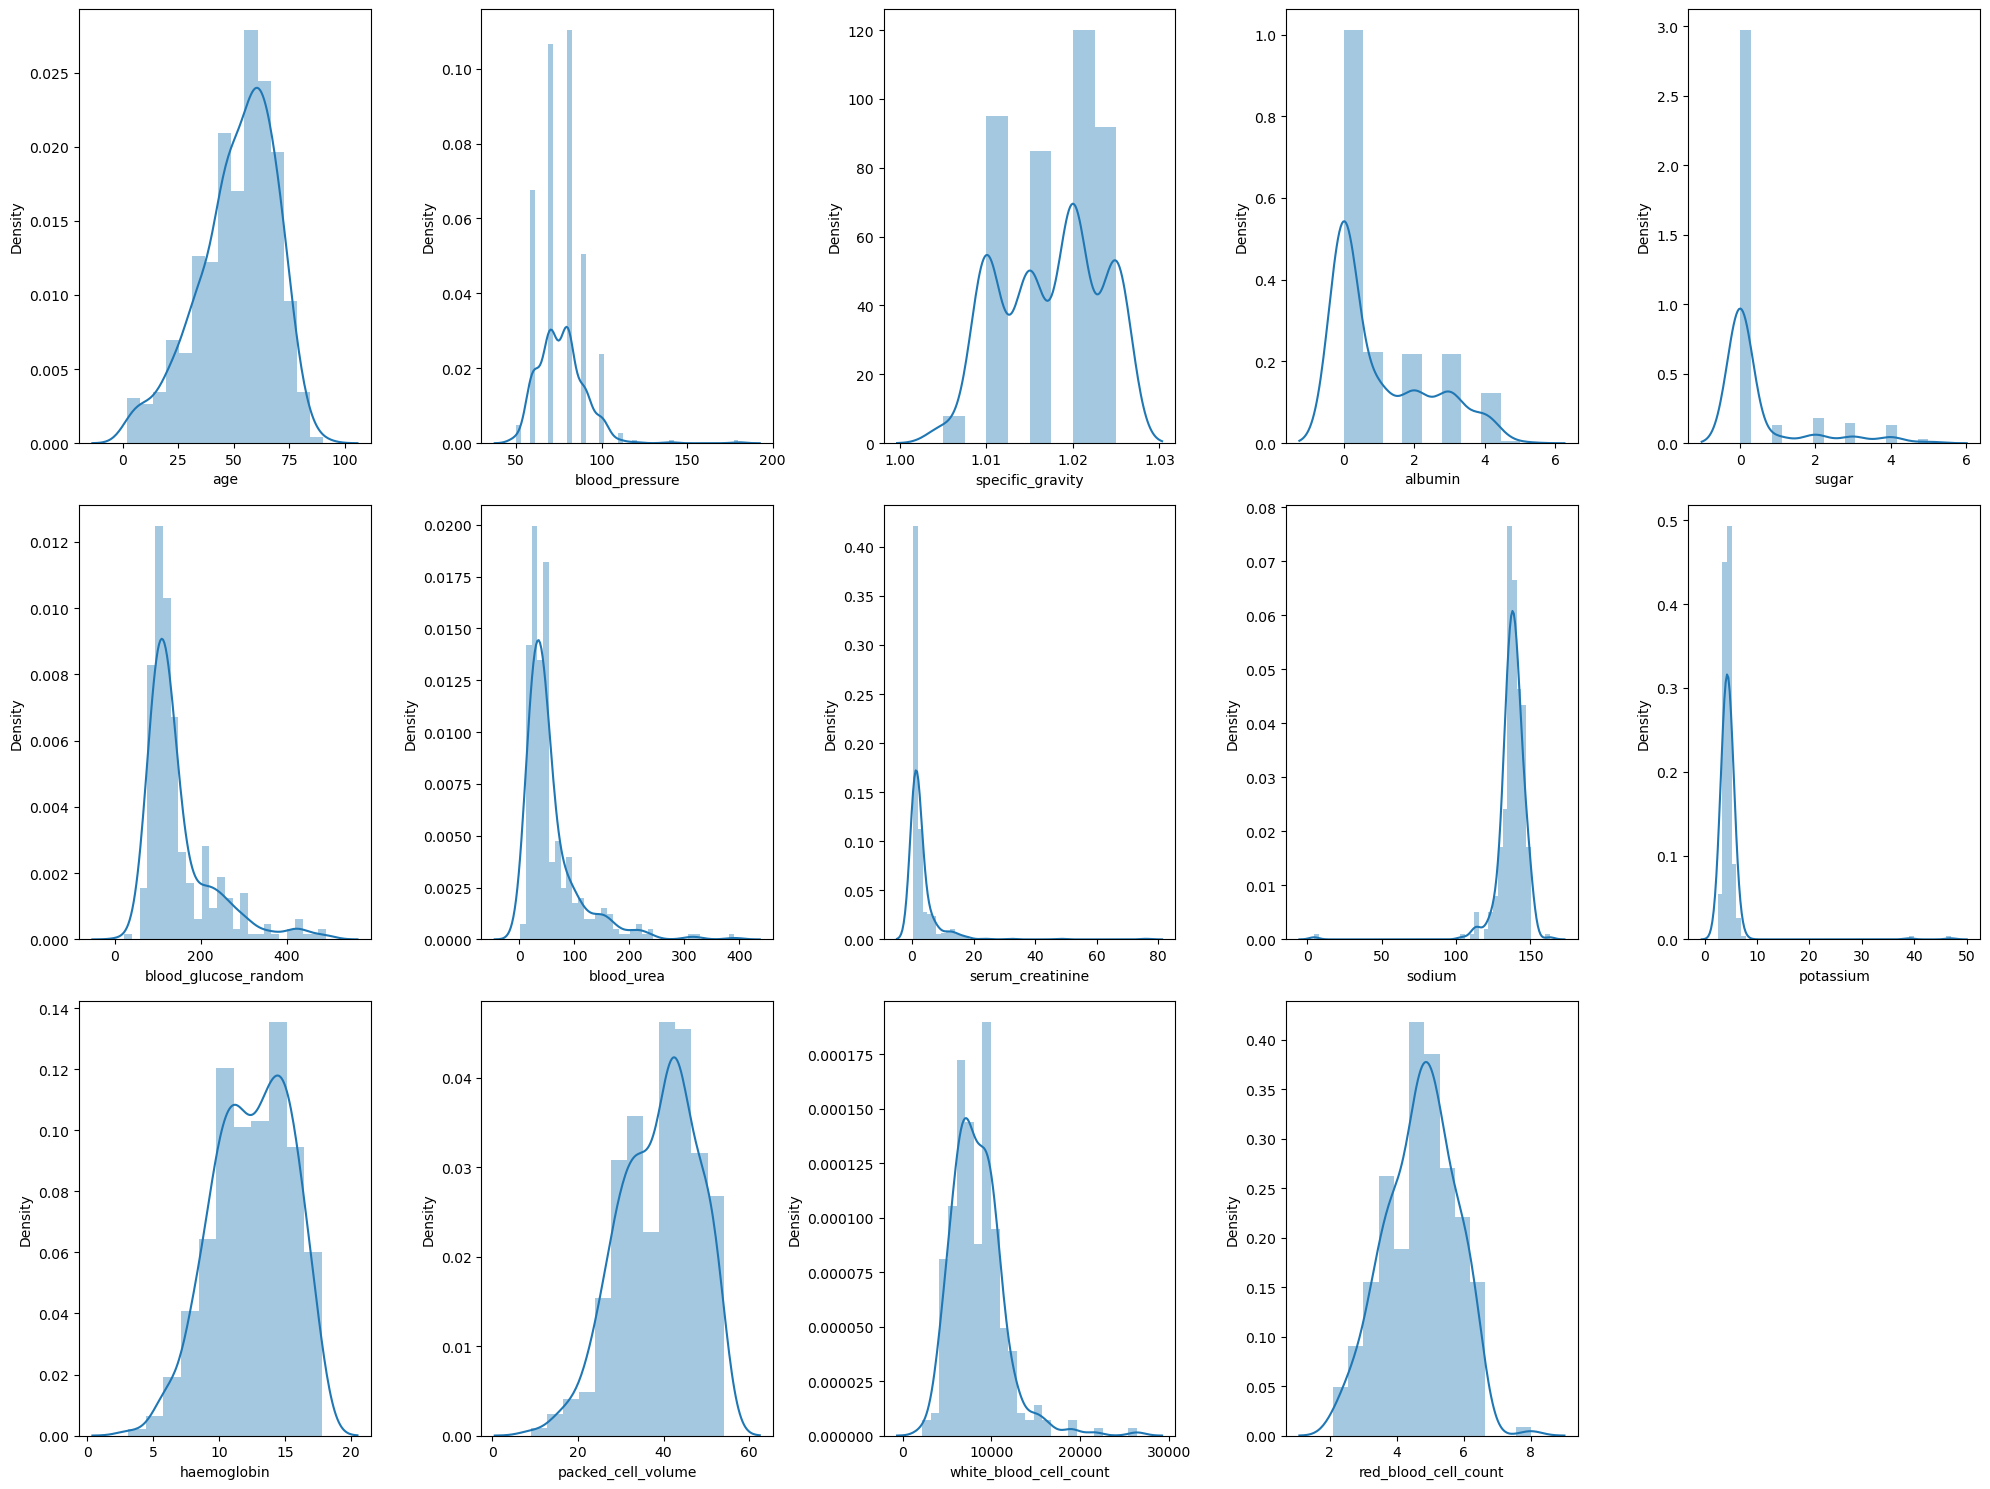

In [19]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [20]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
aanemia                      1
appetite                     1
peda_edema                   1
id                           0
Target                       0
dtype: int64

In [21]:
df[num_cols].isna().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [22]:
df[object_cols].isna().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
Target                       0
dtype: int64

In [23]:
df[num_cols].isna().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [24]:
df[object_cols].isna().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
Target                       0
dtype: int64

In [25]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [26]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [27]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in object_cols:
    impute_mode(col)

In [28]:
df[object_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
Target                     0
dtype: int64

In [29]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [30]:
df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'Target'],
      dtype='object')

In [31]:
df.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
Target                     0
dtype: int64

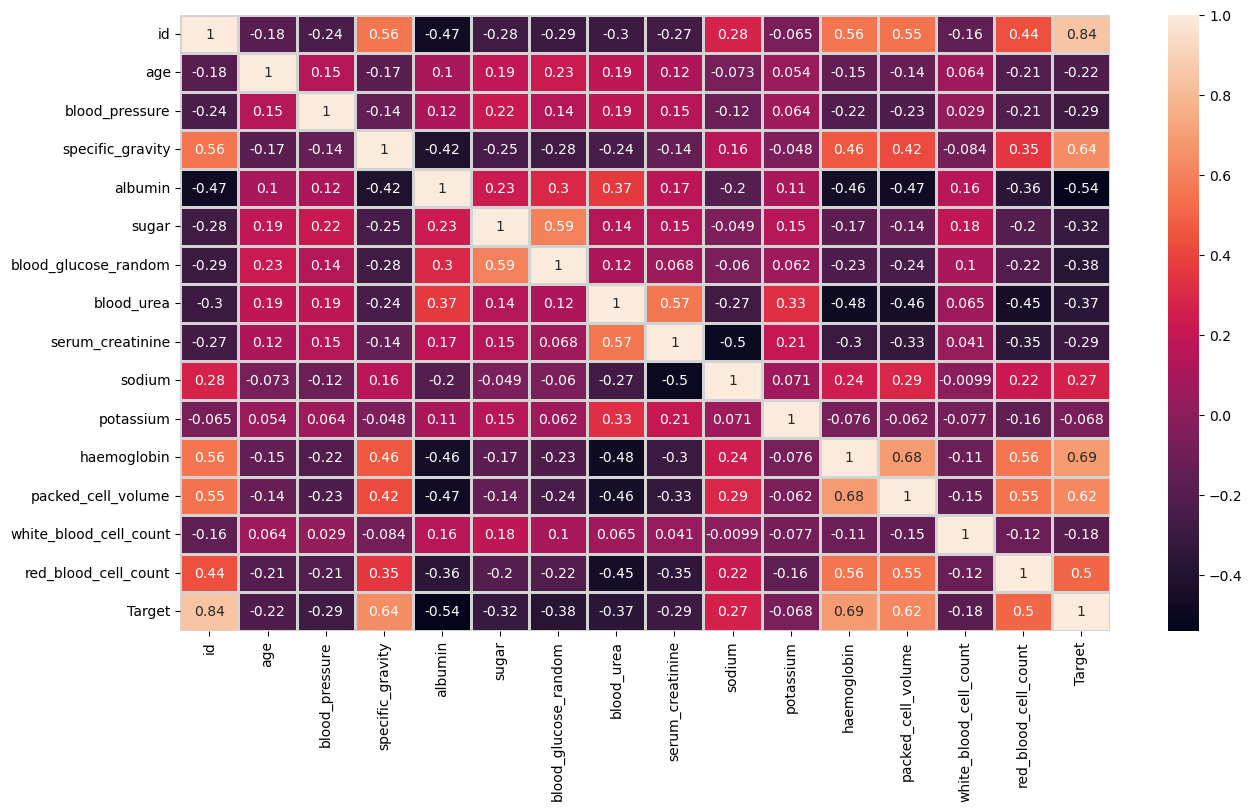

In [32]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

## EDA (Exploratory Data Analysis)

In [33]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="Target", color="Target", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="Target", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

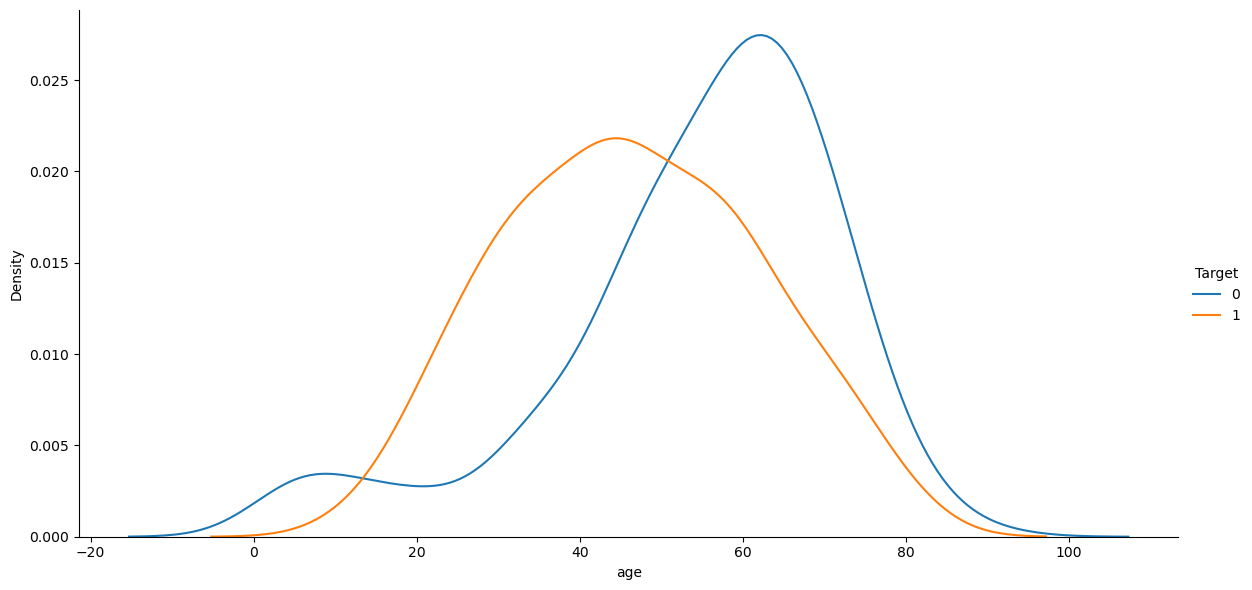

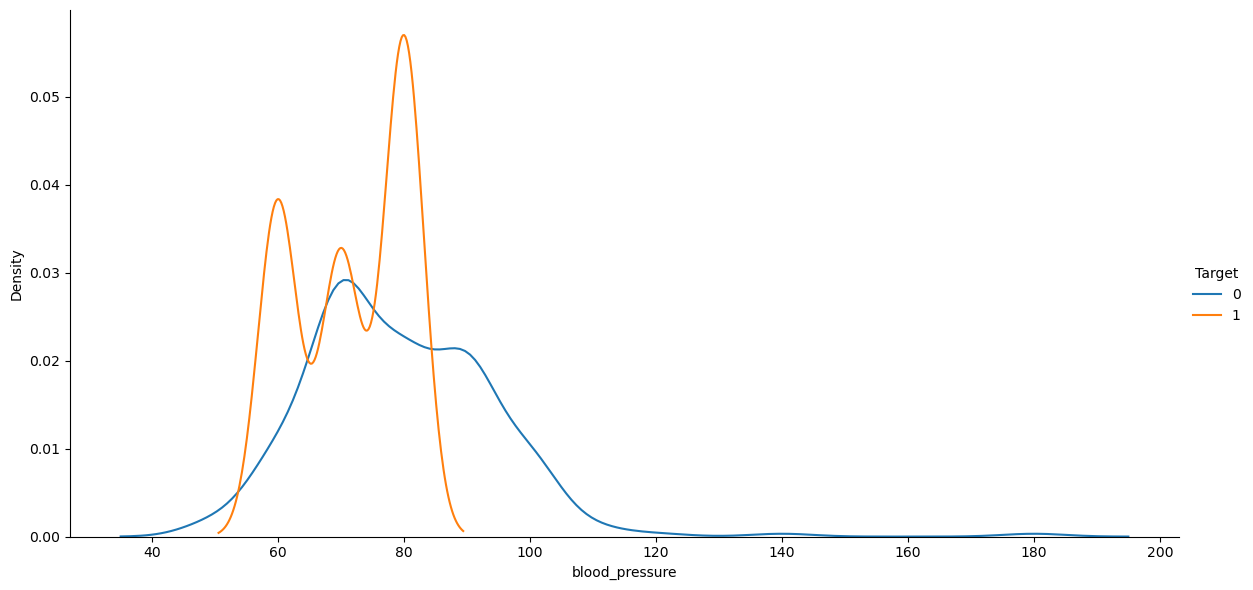

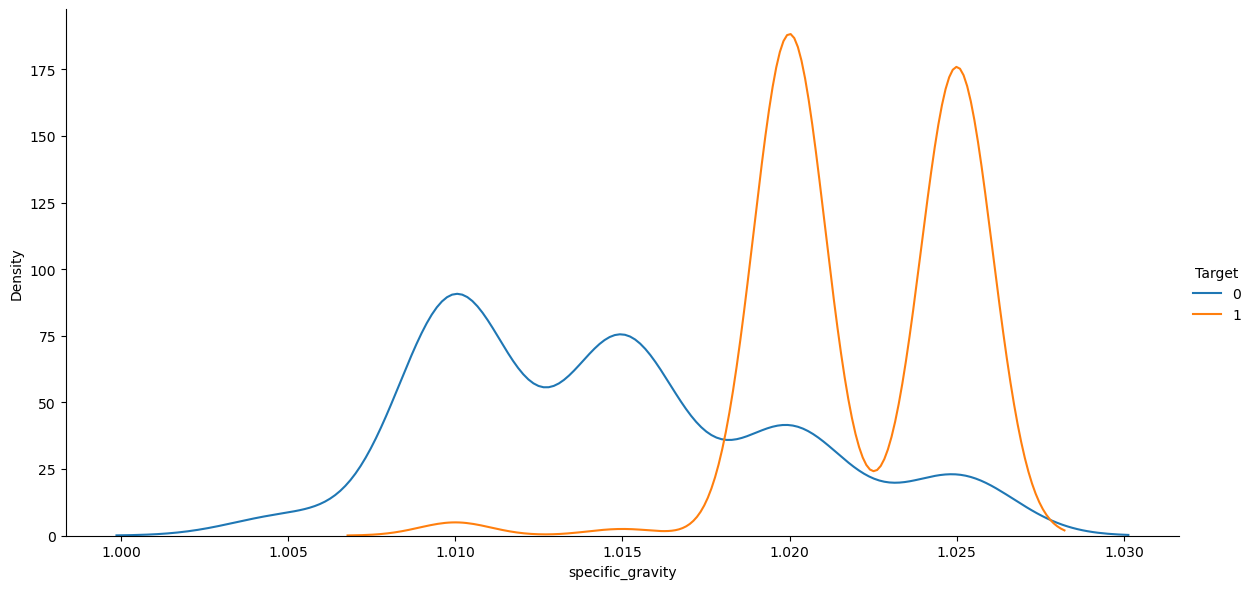

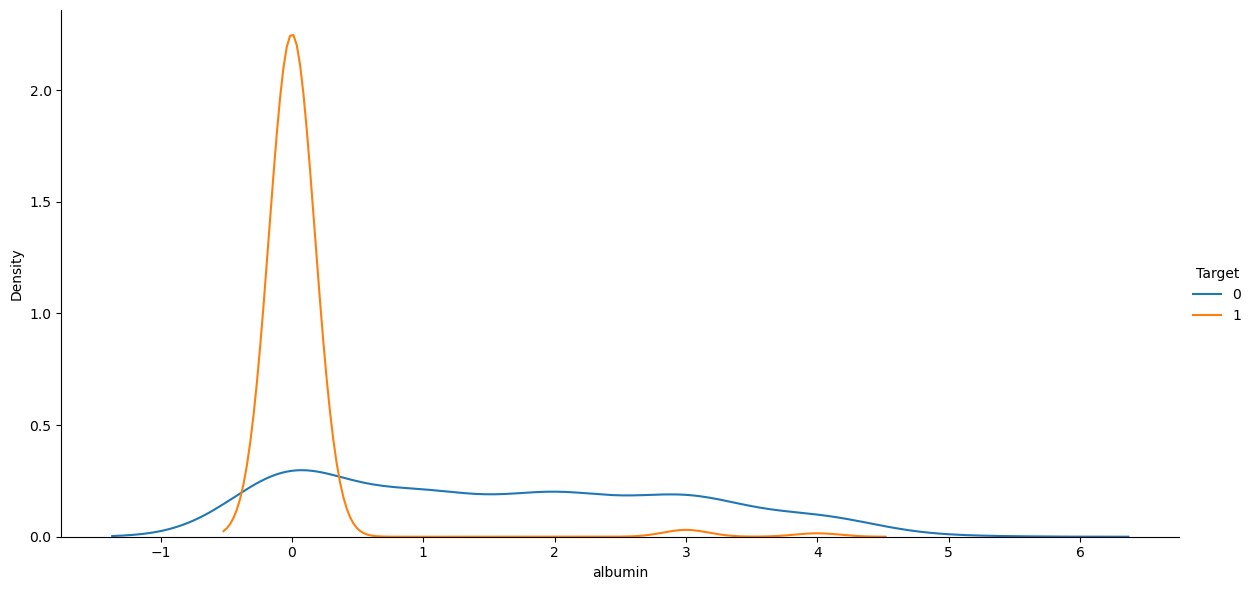

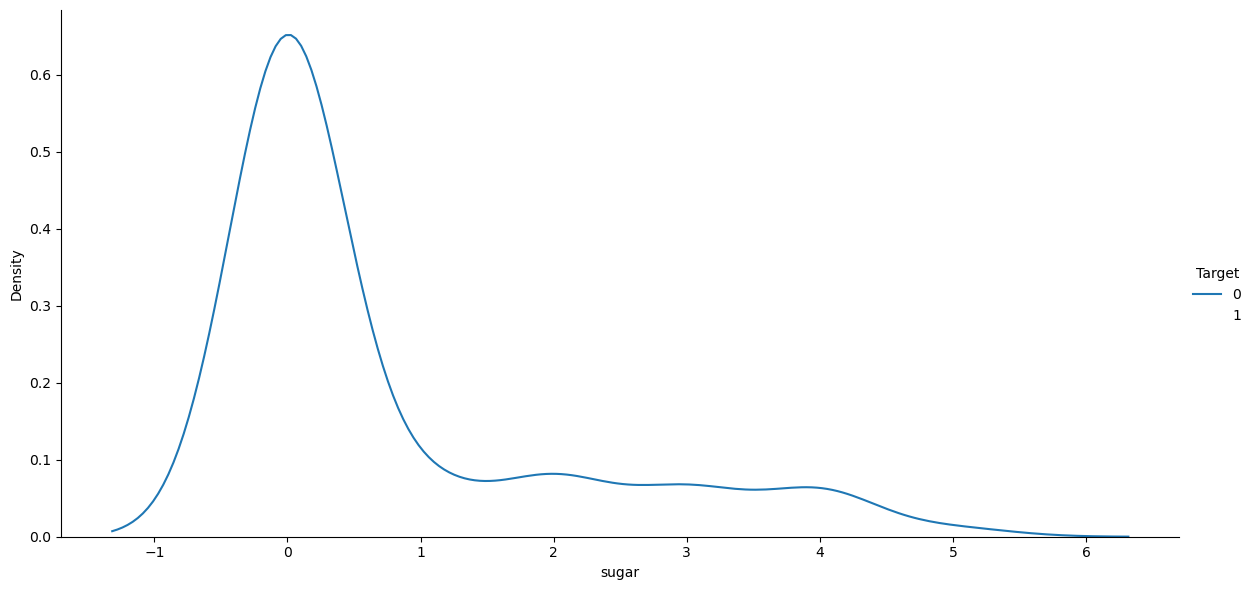

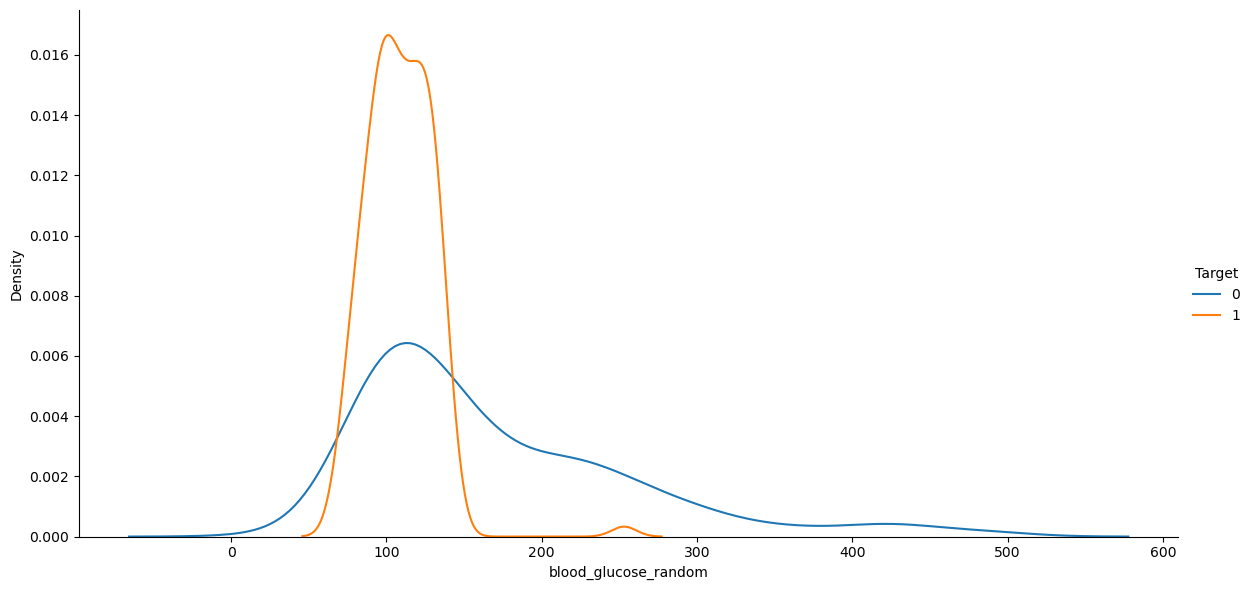

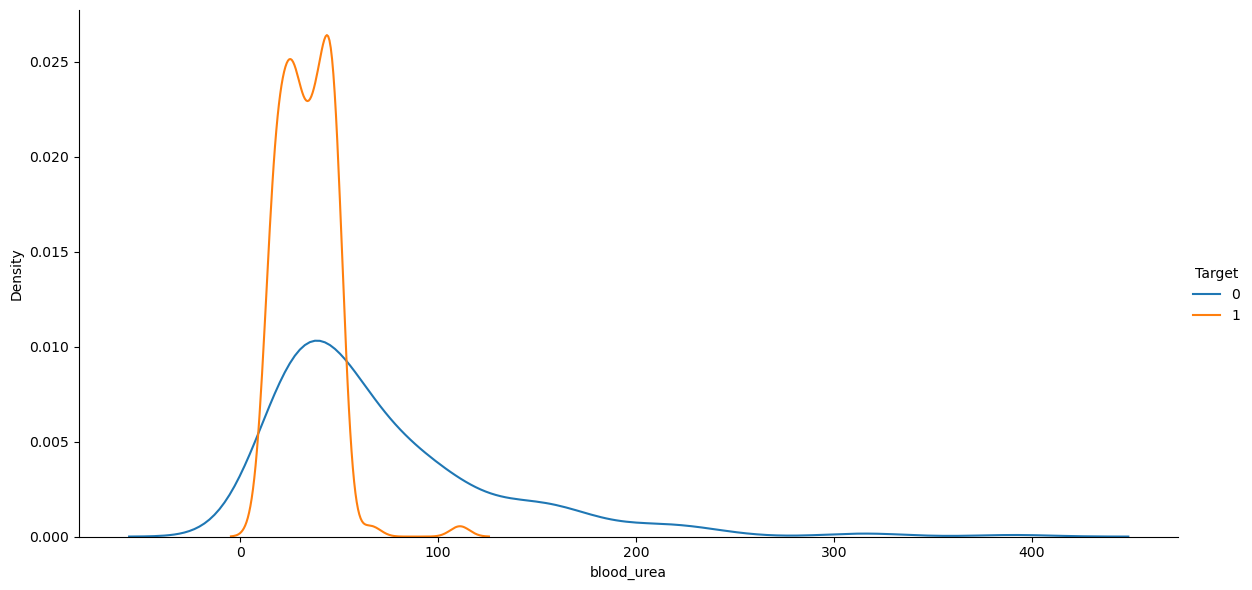

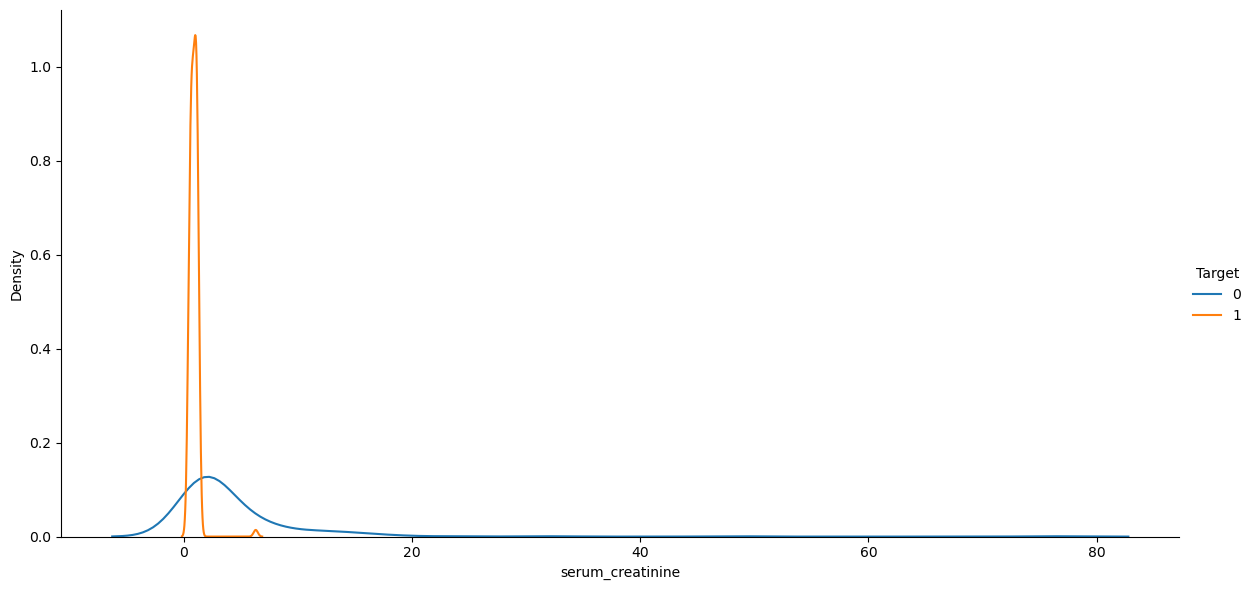

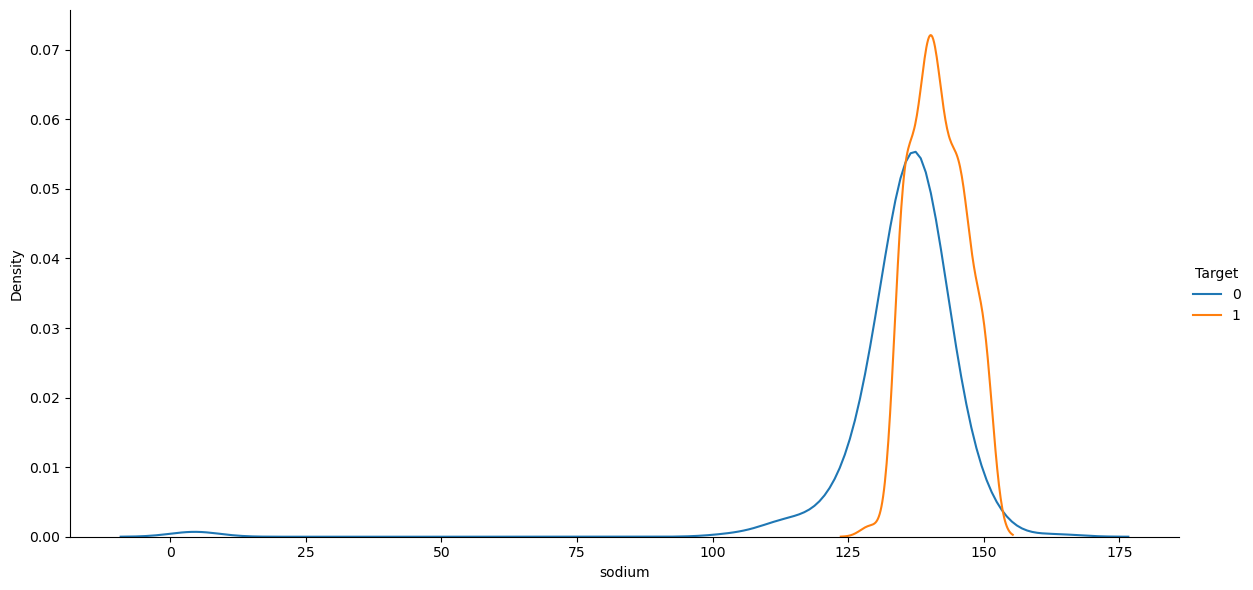

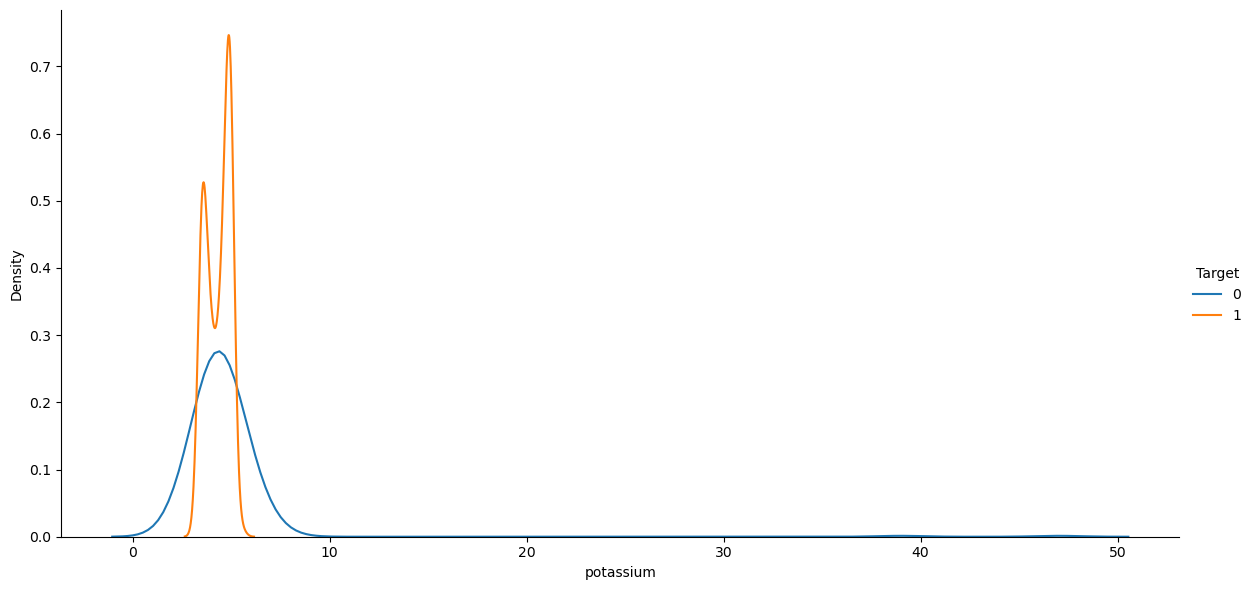

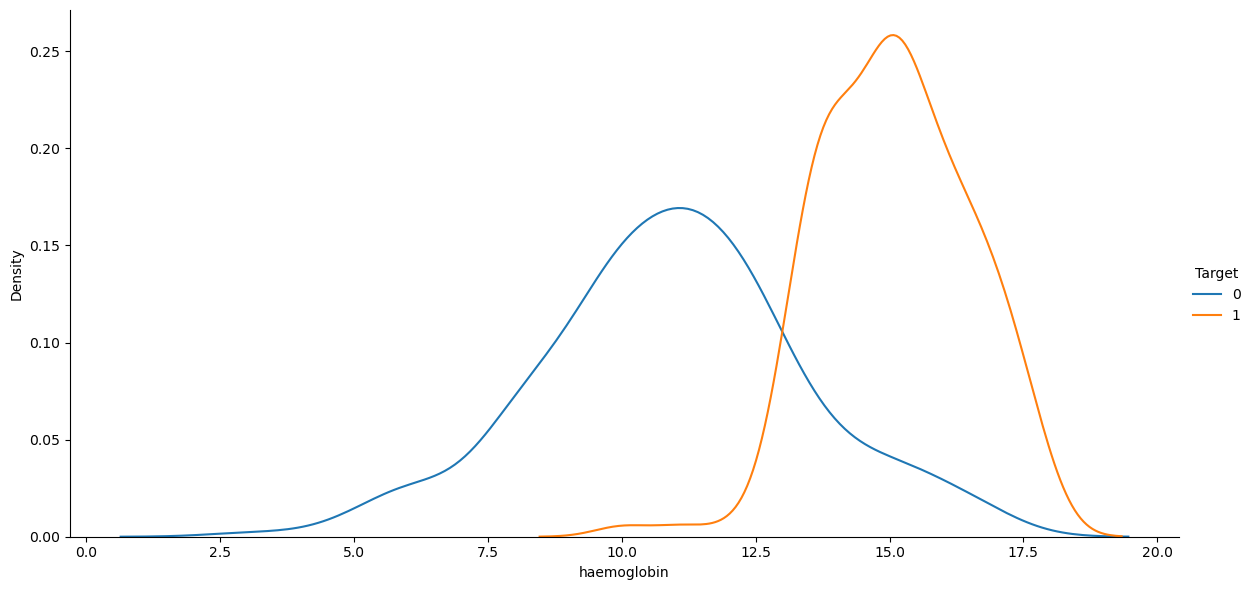

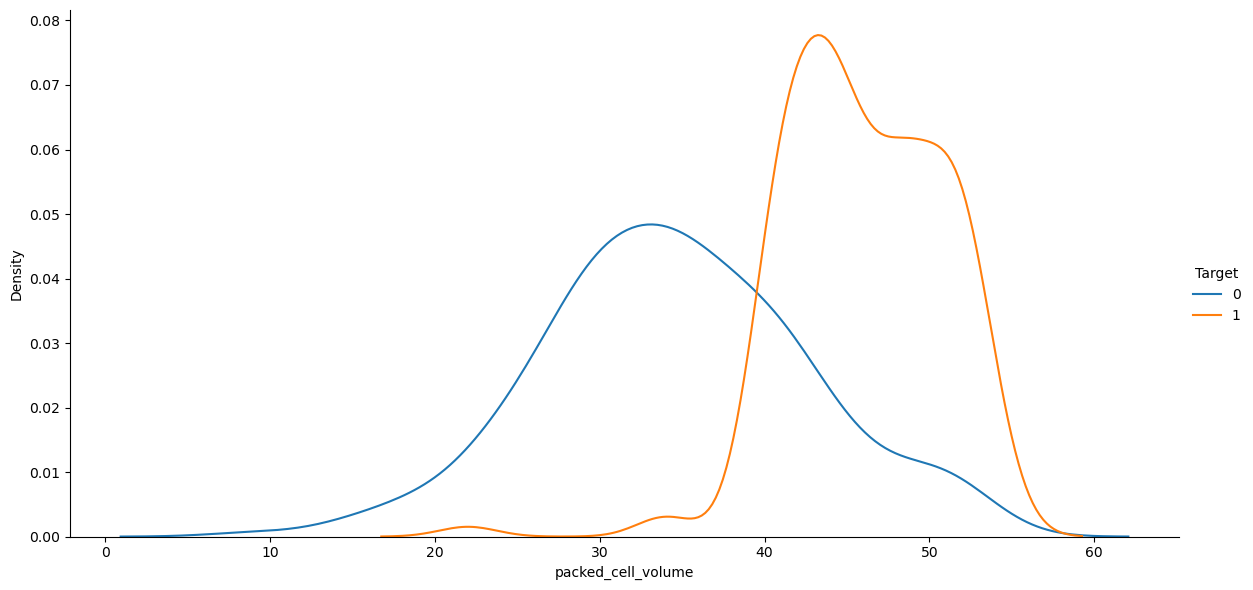

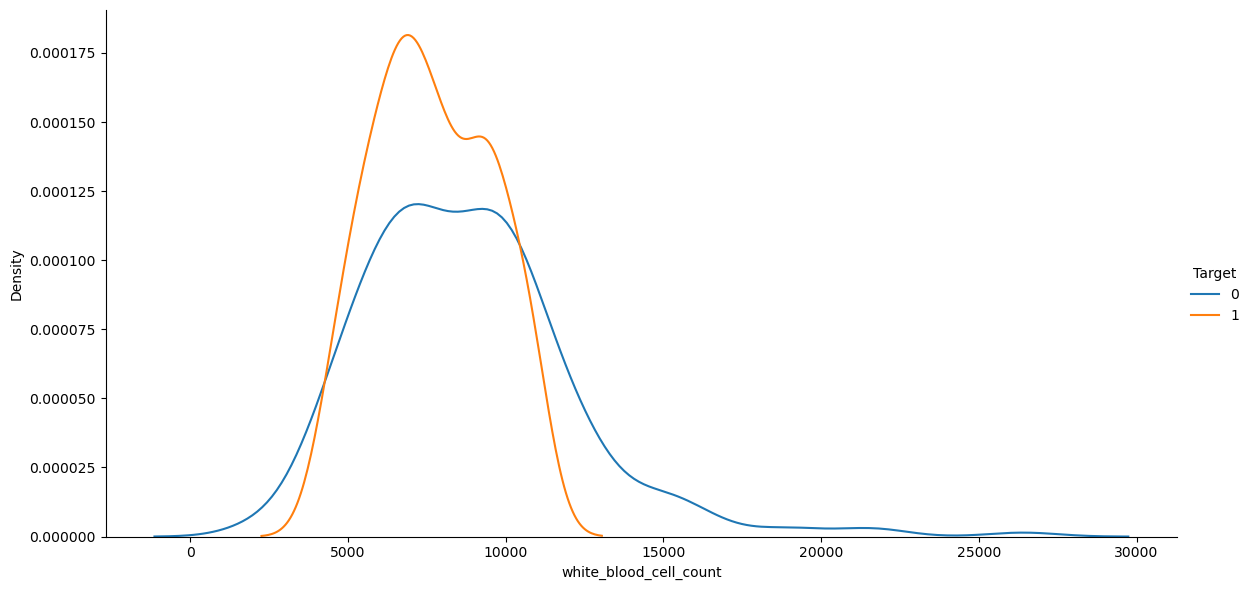

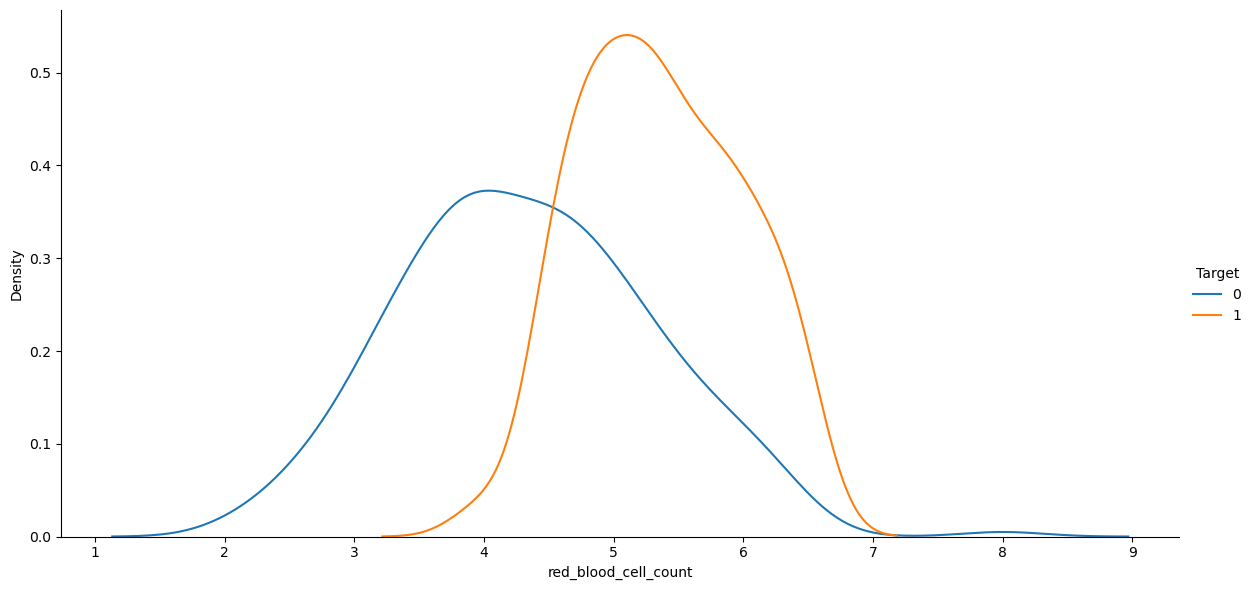

In [34]:
for col in num_cols:
    if col!= 'Target':
        kde(col)

In [35]:
df = df.drop('id', axis=1)
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,Target
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.0,...,38.0,6000.0,4.1,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.1,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


## Now that all of the missing values have been handled, let's move on to categorical feature encoding.

## FEATURE ENCODING and FEATURE ENGINEERING

In [36]:
for col in object_cols:
    print('{} has unique values: {}'.format(col, df[col].unique()))

red_blood_cells has unique values: ['normal' 'abnormal']
pus_cell has unique values: ['normal' 'abnormal']
pus_cell_clumps has unique values: ['notpresent' 'present']
bacteria has unique values: ['notpresent' 'present']
hypertension has unique values: ['yes' 'no']
diabetes_mellitus has unique values: ['yes' 'no']
coronary_artery_disease has unique values: ['no' 'yes']
appetite has unique values: ['good' 'poor']
peda_edema has unique values: ['no' 'yes']
aanemia has unique values: ['no' 'yes']
Target has unique values: [0 1]


In [37]:
#As all of the categorical columns have 2 categories we can use label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in object_cols:
    df[col] = le.fit_transform(df[col])

In [38]:
df[object_cols]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,Target
0,1,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [39]:
df[object_cols].columns

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'aanemia', 'Target'],
      dtype='object')

In [40]:
df[num_cols].columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [41]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [42]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'Target'],
      dtype='object')

In [43]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,Target
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.0,...,38.0,6000.0,4.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Model Building and Model Selection

In [44]:
num_feature=[]
for col in df.columns:
    if col!= 'id' and col!= 'Target':
        num_feature.append(col)

# print object columns
print(num_feature)

['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df[num_cols])

final_df = pd.DataFrame(data=X_train_scaled, columns = num_cols)
final_df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,-0.198051,0.260701,0.443587,0.001873,-0.416738,-0.332736,-0.424494,-0.326579,-0.472633,-0.379888,0.990236,0.576355,-0.188711,0.484290
1,-2.591588,-1.958028,0.443587,2.248894,-0.416738,0.019435,-0.785161,-0.397589,0.297616,-0.203851,-0.410115,-0.095127,-0.802960,-0.624964
2,0.619255,0.260701,-1.287484,0.750880,2.301117,3.606360,-0.083865,-0.220064,-0.044717,-0.098229,-0.990749,-0.878522,-0.291086,-0.624964
3,-0.198051,-0.478876,-2.153019,2.248894,-0.416738,-0.384910,-0.023754,0.134985,-2.269882,-0.731962,-0.444270,-0.766608,-0.564085,-0.826646
4,-0.022914,0.260701,-1.287484,0.750880,-0.416738,-0.528387,-0.624865,-0.291074,-0.215884,-0.063021,-0.307650,-0.430867,-0.359336,-0.120757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.210602,0.260701,0.443587,-0.747135,-0.416738,-0.084912,-0.164013,-0.450847,1.067865,0.113016,1.092701,0.912096,-0.564085,0.181766
396,-0.548324,-0.478876,1.309122,-0.747135,-0.416738,-0.932731,-0.524680,-0.326579,0.297616,-0.379888,1.365941,1.695491,-0.188711,1.492703
397,-2.299693,0.260701,0.443587,-0.747135,-0.416738,-0.606647,-0.624865,-0.433094,-0.044717,-0.063021,1.126856,1.135923,-0.598210,0.685973
398,-2.007798,-1.218452,1.309122,-0.747135,-0.416738,-0.424040,-0.143976,-0.362084,-0.215884,0.113016,0.580377,1.359750,-0.393461,1.190179


In [46]:
final_df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [47]:
object_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'Target']

In [88]:
first_row = df.iloc[397]
print(first_row)

age                          12.00
blood_pressure               80.00
specific_gravity              1.02
albumin                       0.00
sugar                         0.00
red_blood_cells               1.00
pus_cell                      1.00
pus_cell_clumps               0.00
bacteria                      0.00
blood_glucose_random        100.00
blood_urea                   26.00
serum_creatinine              0.60
sodium                      137.00
potassium                     4.40
haemoglobin                  15.80
packed_cell_volume           49.00
white_blood_cell_count     6600.00
red_blood_cell_count          5.40
hypertension                  0.00
diabetes_mellitus             0.00
coronary_artery_disease       0.00
appetite                      0.00
peda_edema                    0.00
aanemia                       0.00
Target                        1.00
Name: 397, dtype: float64


In [48]:
import pandas as pd

concatenated_df = pd.concat([final_df, df[object_cols]], axis=1)

concatenated_df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,Target
0,-0.198051,0.260701,0.443587,0.001873,-0.416738,-0.332736,-0.424494,-0.326579,-0.472633,-0.379888,...,1,0,0,1,1,0,0,0,0,0
1,-2.591588,-1.958028,0.443587,2.248894,-0.416738,0.019435,-0.785161,-0.397589,0.297616,-0.203851,...,1,0,0,0,0,0,0,0,0,0
2,0.619255,0.260701,-1.287484,0.750880,2.301117,3.606360,-0.083865,-0.220064,-0.044717,-0.098229,...,1,0,0,0,1,0,1,0,1,0
3,-0.198051,-0.478876,-2.153019,2.248894,-0.416738,-0.384910,-0.023754,0.134985,-2.269882,-0.731962,...,0,1,0,1,0,0,1,1,1,0
4,-0.022914,0.260701,-1.287484,0.750880,-0.416738,-0.528387,-0.624865,-0.291074,-0.215884,-0.063021,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.210602,0.260701,0.443587,-0.747135,-0.416738,-0.084912,-0.164013,-0.450847,1.067865,0.113016,...,1,0,0,0,0,0,0,0,0,1
396,-0.548324,-0.478876,1.309122,-0.747135,-0.416738,-0.932731,-0.524680,-0.326579,0.297616,-0.379888,...,1,0,0,0,0,0,0,0,0,1
397,-2.299693,0.260701,0.443587,-0.747135,-0.416738,-0.606647,-0.624865,-0.433094,-0.044717,-0.063021,...,1,0,0,0,0,0,0,0,0,1
398,-2.007798,-1.218452,1.309122,-0.747135,-0.416738,-0.424040,-0.143976,-0.362084,-0.215884,0.113016,...,1,0,0,0,0,0,0,0,0,1


In [49]:
concatenated_df.shape

(400, 25)

In [50]:
concatenated_df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'red_blood_cells',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'Target'],
      dtype='object')

In [51]:
# splitting data intp training and test set
from sklearn.model_selection import train_test_split

X = concatenated_df.iloc[:,:-1]
y = concatenated_df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((320, 24), (80, 24))

In [52]:
concatenated_df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Target, Length: 400, dtype: int64

## Logistic Regression

In [53]:
# fitting data to model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Training accuracy: ',accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',lr_acc)
print('\n')

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Training accuracy:  0.996875
Testing accuracy:  0.9625


[[51  1]
 [ 2 26]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



## KNN

In [54]:
## KNN in range

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_k = []

k_test = list(range(1,11))

for k in k_test:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred_val = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_val)
  accuracy_k.append(accuracy)


accuracy_k

[0.925, 0.9625, 0.95, 0.9625, 0.95, 0.9375, 0.95, 0.95, 0.925, 0.9375]

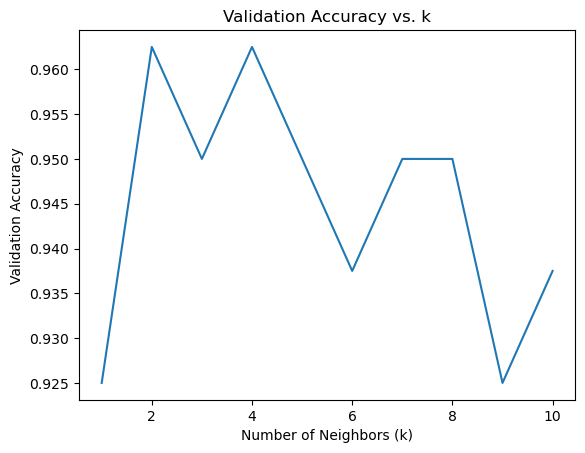

In [55]:
plt.plot(k_test, accuracy_k)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. k')
plt.show()

In [56]:
best_k_index = accuracy_k.index(max(accuracy_k))
best_k = k_test[best_k_index]
print("Best k value: ", best_k)

Best k value:  2


In [57]:
# KNN in best k=1 value

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 1.0
Test Accuracy of KNN is 0.925 

Confusion Matrix :- 
[[47  5]
 [ 1 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[50  2]
 [ 2 26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [59]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'random'}
0.98125


In [60]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9875
Test Accuracy of Decision Tree Classifier is 0.9625 

Confusion Matrix :- 
[[52  0]
 [ 3 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



## Random Forest

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='sqrt')  # Update max_features parameter

grid_param = {'criterion' : ['gini', 'entropy'],
              'n_estimators' : [50, 100, 200, 400, 500],
              'max_depth' : [3, 5, 7, 10],
              'min_samples_leaf' : [1, 2, 3, 5, 7],
              'min_samples_split' : [1, 2, 3, 5, 7],
              'max_features' : ['sqrt']
}

grid_search_dtc = GridSearchCV(rf, grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search_dtc.fit(X_train, y_train)

# best parameters and best score

print(grid_search_dtc.best_params_)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [62]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 5, 
                                min_samples_split = 3, n_estimators = 50)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.99375
Test Accuracy of Random Forest Classifier is 0.9875 

Confusion Matrix :- 
[[52  0]
 [ 1 27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



## SVC

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True)
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svm, parameters)
grid_search.fit(X_train, y_train)


print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.99375


In [64]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 0.5, gamma = 0.1, probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('Training accuracy: ',accuracy_score(y_train, svm.predict(X_train)))

svm_acc = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',svm_acc)
print('\n')

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Training accuracy:  0.990625
Testing accuracy:  0.95


[[51  1]
 [ 3 25]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        52
           1       0.96      0.89      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



## Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

print(grid_search_gbc.best_params_)
print(grid_search_gbc.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and 

/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and 

/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/Applications/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and 

{'learning_rate': 1, 'loss': 'deviance', 'n_estimators': 200}
0.975


In [66]:
from sklearn.ensemble import GradientBoostingClassifier

gbc1 = GradientBoostingClassifier()

gbc1 = GradientBoostingClassifier(learning_rate = 1, loss = 'deviance', n_estimators = 100)
gbc1.fit(X_train, y_train)

y_pred = gbc1.predict(X_test)

print('Training accuracy: ',accuracy_score(y_train, gbc1.predict(X_train)))

gbc1_acc = accuracy_score(y_test, y_pred)
print('Testing accuracy: ',gbc1_acc)
print('\n')

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Training accuracy:  1.0
Testing accuracy:  0.975


[[52  0]
 [ 2 26]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [67]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'SVM', 'Gradient Boosting'],
    'Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc, svm_acc, gbc1_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.9875
5,Gradient Boosting,0.9750
0,Logistic Regression,0.9625
2,Decision Tree Classifier,0.9625
4,SVM,0.9500
1,KNN,0.9250


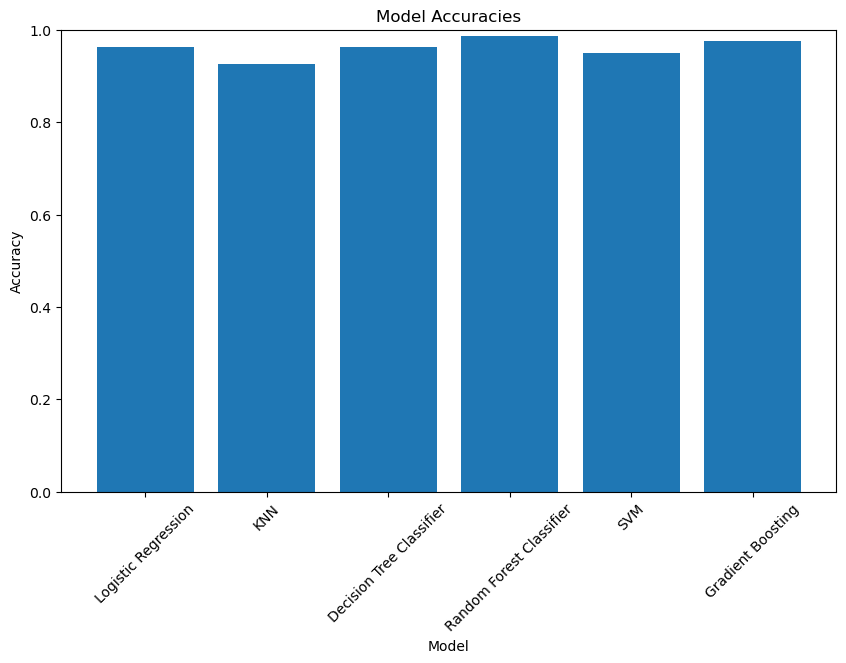

In [68]:
import matplotlib.pyplot as plt

# Create a bar plot of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(models['Model'], models['Score'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

## MODELS COMPARISON

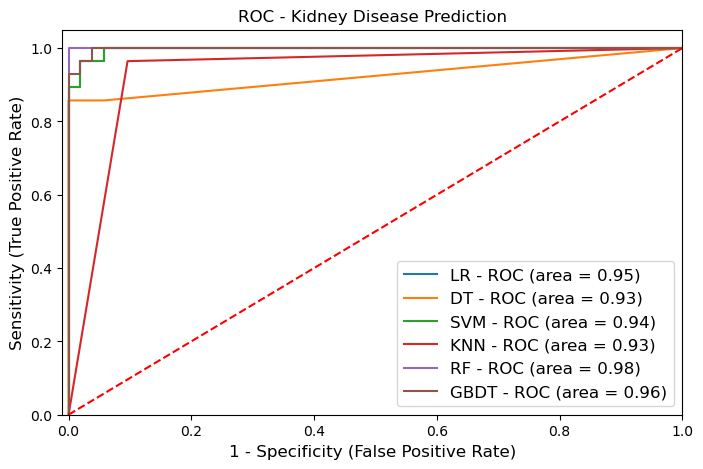

In [69]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rd_clf,
},
{
    'label': 'GBDT',
    'model': gbc1,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [70]:
#import pickle

#filename1 = 'model1_kd.sav'
#filename2 = 'model2_kd.sav'
#filename3 = 'model3_kd.sav'

#pickle.dump(rd_clf, open(filename1, 'wb'))
#pickle.dump(lr, open(filename2, 'wb'))
#pickle.dump(gbc1, open(filename3, 'wb'))

In [71]:
# Save the scaler object to a file
#with open('scaler_kd.pkl', 'wb') as f:
 #   pickle.dump(scaler, f)